In [210]:
pip install tensorflow

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [212]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Removeing ["RowNumber" , "CustomerId" , "Surname"]**

In [213]:
df.drop(["RowNumber" , "CustomerId" , "Surname"],axis=1, inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [215]:
df.isnull().count()

CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

Replace Male - 1 , Female - 0

In [216]:
df["Gender"].replace({"Male":1 , "Female":0} , inplace=True)

In [217]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


See unique values in each col

In [218]:
for col in df:
  print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

**One hot encideing**

In [219]:
df = pd.get_dummies(data=df, columns=["Geography"])

In [220]:
df = pd.get_dummies(data=df, columns=["NumOfProducts"])

In [221]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [222]:
df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


In [223]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df[["CreditScore" , "Age", "Balance" , "EstimatedSalary"]] = scalar.fit_transform(df[["CreditScore" , "Age", "Balance" , "EstimatedSalary"]])

In [224]:
df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,0,0.310811,1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,0,0.324324,8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,0,0.283784,1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,0,0.337838,2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0


see co relation

In [225]:
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,-0.014813,0.015819,-0.004145,0.002455
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889,0.005488,0.010171,-0.035143,-0.027936
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.072852,-0.102604,0.067365,0.050092
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.013423,0.012438,-0.000517,0.007716
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,0.359646,-0.363260,-0.002722,0.021476
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.003845,0.003414,0.003186,-0.003778
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022321,0.032802,-0.029864,-0.004938
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,-0.010663,0.005795,0.012153,0.006314
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.185447,-0.292474,0.255862,0.153612
Geography_France,-0.008928,0.006772,-0.039208,-0.002848,-0.231329,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.014049,0.026318,-0.036508,-0.002807


In [226]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
dtype: object

Train Test Split

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
x = df.drop("Exited" , axis = 1)
y = df["Exited"]

In [229]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [230]:
x_train.shape

(8000, 15)

In [231]:
y_train.shape

(8000,)

In [232]:
x_test.shape

(2000, 15)

In [233]:
y_test.shape

(2000,)

Build a model (ANN) in tensorflow/keras

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential(
    [
        Dense(15,activation = "relu"),
        Dense(100,activation = "relu"),
        Dense(50,activation = "relu"),
        Dense(1,activation = "sigmoid")
    ]
)
model.compile(
    loss = tensorflow.keras.losses.binary_crossentropy,
    optimizer = tensorflow.keras.optimizers.Adam(0.001),
    metrics = "accuracy"
)


In [235]:
model.fit(x_train,y_train,epochs=70)

Epoch 1/70
250/250 [==============================] - 4s 5ms/step - loss: 0.4542 - accuracy: 0.8056
Epoch 2/70
250/250 [==============================] - 1s 5ms/step - loss: 0.3946 - accuracy: 0.8321
Epoch 3/70
250/250 [==============================] - 1s 4ms/step - loss: 0.3854 - accuracy: 0.8361
Epoch 4/70
250/250 [==============================] - 1s 4ms/step - loss: 0.3780 - accuracy: 0.8414
Epoch 5/70
250/250 [==============================] - 1s 4ms/step - loss: 0.3718 - accuracy: 0.8438
Epoch 6/70
250/250 [==============================] - 2s 6ms/step - loss: 0.3672 - accuracy: 0.8462
Epoch 7/70
250/250 [==============================] - 2s 6ms/step - loss: 0.3672 - accuracy: 0.8429
Epoch 8/70
250/250 [==============================] - 1s 5ms/step - loss: 0.3636 - accuracy: 0.8468
Epoch 9/70
250/250 [==============================] - 2s 6ms/step - loss: 0.3582 - accuracy: 0.8501
Epoch 10/70
250/250 [==============================] - 2s 9ms/step - loss: 0.3562 - accuracy: 0.8495

In [236]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8575


[0.35240259766578674, 0.8575000166893005]

In [238]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [239]:
y_pred[:10]

array([[0.03573538],
       [0.00195032],
       [0.10341353],
       [0.11953427],
       [0.03266919],
       [0.00847201],
       [0.19307253],
       [0.2708862 ],
       [0.19042921],
       [0.5861873 ]], dtype=float32)

In [240]:
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [241]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [242]:
y_test.head(10)

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [243]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

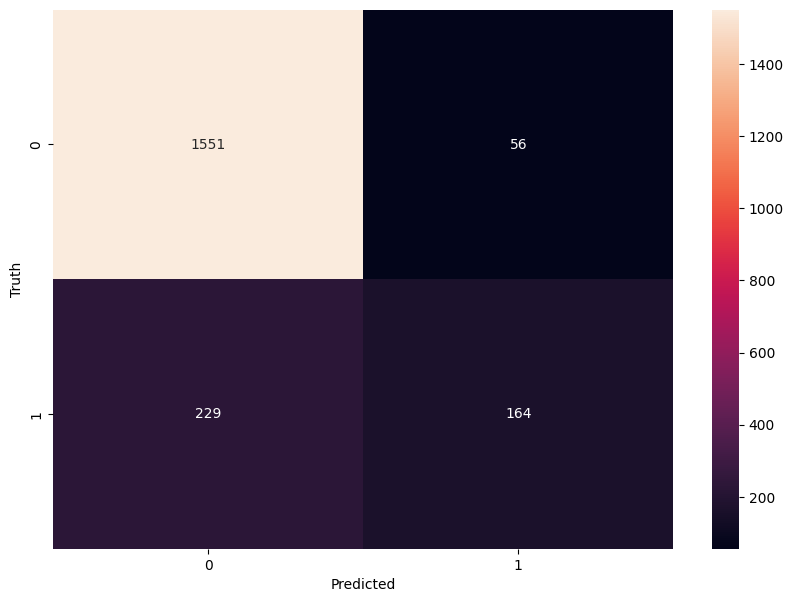

In [245]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')